In [8]:
!pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import subprocess
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib_venn as venn
#from matplotlib-venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

In [4]:
from matplotlib_venn import venn3, venn3_circles

In [1]:
gitpath='/home/guatney/Plasmidome-of-GROWdb/'

In [6]:
#an important note: this only works if everything in the directory is everything you want. ChatGPT gave me a chunk of code
#theoretically for incorporating wildcards but it didn't work

# Run the 'ls' command and capture the output
output = subprocess.check_output(['ls', gitpath+'filteredplaton']).decode('utf-8')

# Split the output into a list of filenames
filterfiles = output.split('\n')

# Remove the last element, which is an empty string
filterfiles = filterfiles[:-1]

# Now, file_list contains the list of filenames in the specified directory

output = subprocess.check_output(['ls', gitpath+'unfilteredplatontsv']).decode('utf-8')

unfilterfiles = output.split('\n')
unfilterfiles = unfilterfiles[:-1]

#output=subprocess.check_output(['ls', '/home/guatney/plasmidome/genomad']).decode('utf-8')
output=subprocess.check_output(['ls', gitpath+'genomad_conservative/']).decode('utf-8')

genomadfiles=output.split('\n')
genomadfiles=genomadfiles[:-1]

In [7]:
sampid_pattern="(.*)_B_1000.*"

In [8]:
def newcontigstring(contigid, sampid):
    newstr=f'{sampid}_{contigid}'
    return newstr

In [9]:
filteredcontigids=[]

for filtsamp in filterfiles:
    #get substring of sampleid from file name
    sampid=re.findall(sampid_pattern, filtsamp)
    tempDF=pd.read_csv(f'/home/guatney/plasmidome/filteredplaton/{filtsamp}')
    newcontigids=tempDF['ID'].apply(newcontigstring, args=sampid)
    filteredcontigids.extend(list(newcontigids))

In [10]:
filteredcontigids

['altamaha_2019_sw_WHONDRS-S19S_0010_k121_928186',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2453520',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2094206',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1310888',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2028527',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1081908',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1950111',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_83602',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1450314',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_123389',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2458212',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_906244',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_112979',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1100900',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_568991',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1716750',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_114407',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_841411',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_983321',
 'arika

In [11]:
unfilteredcontigids=[]

for unfiltsamp in unfilterfiles:
    #get substring of sampleid from file name
    sampid=re.findall(sampid_pattern, unfiltsamp)
    tempDF=pd.read_csv(f'/home/guatney/plasmidome/unfilteredplatontsv/{unfiltsamp}', sep = "\t")
    newcontigids=tempDF['ID'].apply(newcontigstring, args=sampid)
    unfilteredcontigids.extend(list(newcontigids))

In [12]:
unfilteredcontigids

['altamaha_2019_sw_WHONDRS-S19S_0010_k121_2602995',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2602964',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2526294',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2602895',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_25824',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_451750',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1199716',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_790530',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2602891',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_216159',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1309981',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2282015',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2602890',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2603039',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2012415',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_997739',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_140664',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2603117',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1830462',
 'altamaha_2019_sw_

In [13]:
genomadcontigids=[]

for genomadsamp in genomadfiles:
    #get substring of sampleid from file name
    sampid=re.findall(sampid_pattern, genomadsamp)
    # tempDF=pd.read_csv(f'/home/guatney/plasmidome/genomad/{genomadsamp}', sep = "\t")
    tempDF=pd.read_csv(f'/home/guatney/plasmidome/genomad_conservative/{genomadsamp}', sep = "\t")
    newcontigids=tempDF['seq_name'].apply(newcontigstring, args=sampid)
    genomadcontigids.extend(list(newcontigids))

In [14]:
genomadcontigids

['altamaha_2019_sw_WHONDRS-S19S_0010_k121_681165',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_1218164',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_134505',
 'altamaha_2019_sw_WHONDRS-S19S_0010_k121_2542685',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_459552',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_1518329',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_210946',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_647878',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_747272',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_377067',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_522719',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_638844',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_959835',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_1196337',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_102337',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_300185',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_812920',
 'arikareeriver_2019_sw_WHONDRS-S19S_0023_k121_841411',
 'arikar

/home/guatney/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/matplotlib_venn-0.11.9-py3.7.egg/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning


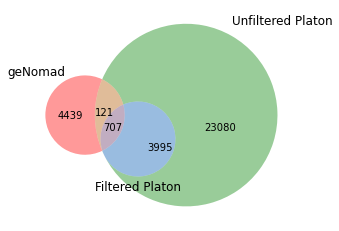

In [15]:
unfilterset=set(unfilteredcontigids)
filterset=set(filteredcontigids)
genomadset=set(genomadcontigids)

venn3(subsets=(genomadset,unfilterset,filterset), set_labels=("geNomad", "Unfiltered Platon", "Filtered Platon"))

In [16]:
len(filterset)

4702

In [17]:
len(genomadset.intersection(unfilterset).intersection(filterset))

707

In [18]:
len(genomadset)

5267

In [19]:
len(genomadset.intersection(unfilterset))

828

In [17]:
len(unfilterset)

27903

In [18]:
len(genomadset.intersection(filterset))

707

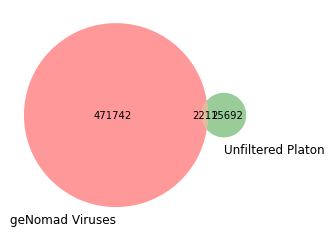

In [25]:
venn2(subsets=(genomadset, unfilterset), set_labels=("geNomad Viruses", "Unfiltered Platon"))

In [27]:
plt.savefig('venn1.png')

<Figure size 432x288 with 0 Axes>

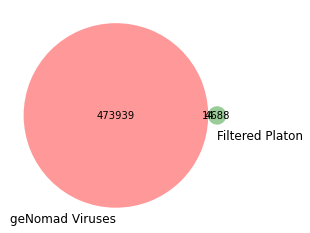

In [18]:
venn2(subsets=(genomadset, filterset), set_labels=("geNomad Viruses", "Filtered Platon"))